Datos cargados correctamente.

--- ANÁLISIS DE PARETO ---
Total de sectores: 23
Top 20% de sectores: 4
Recaudación generada por top 20%: 63.79%


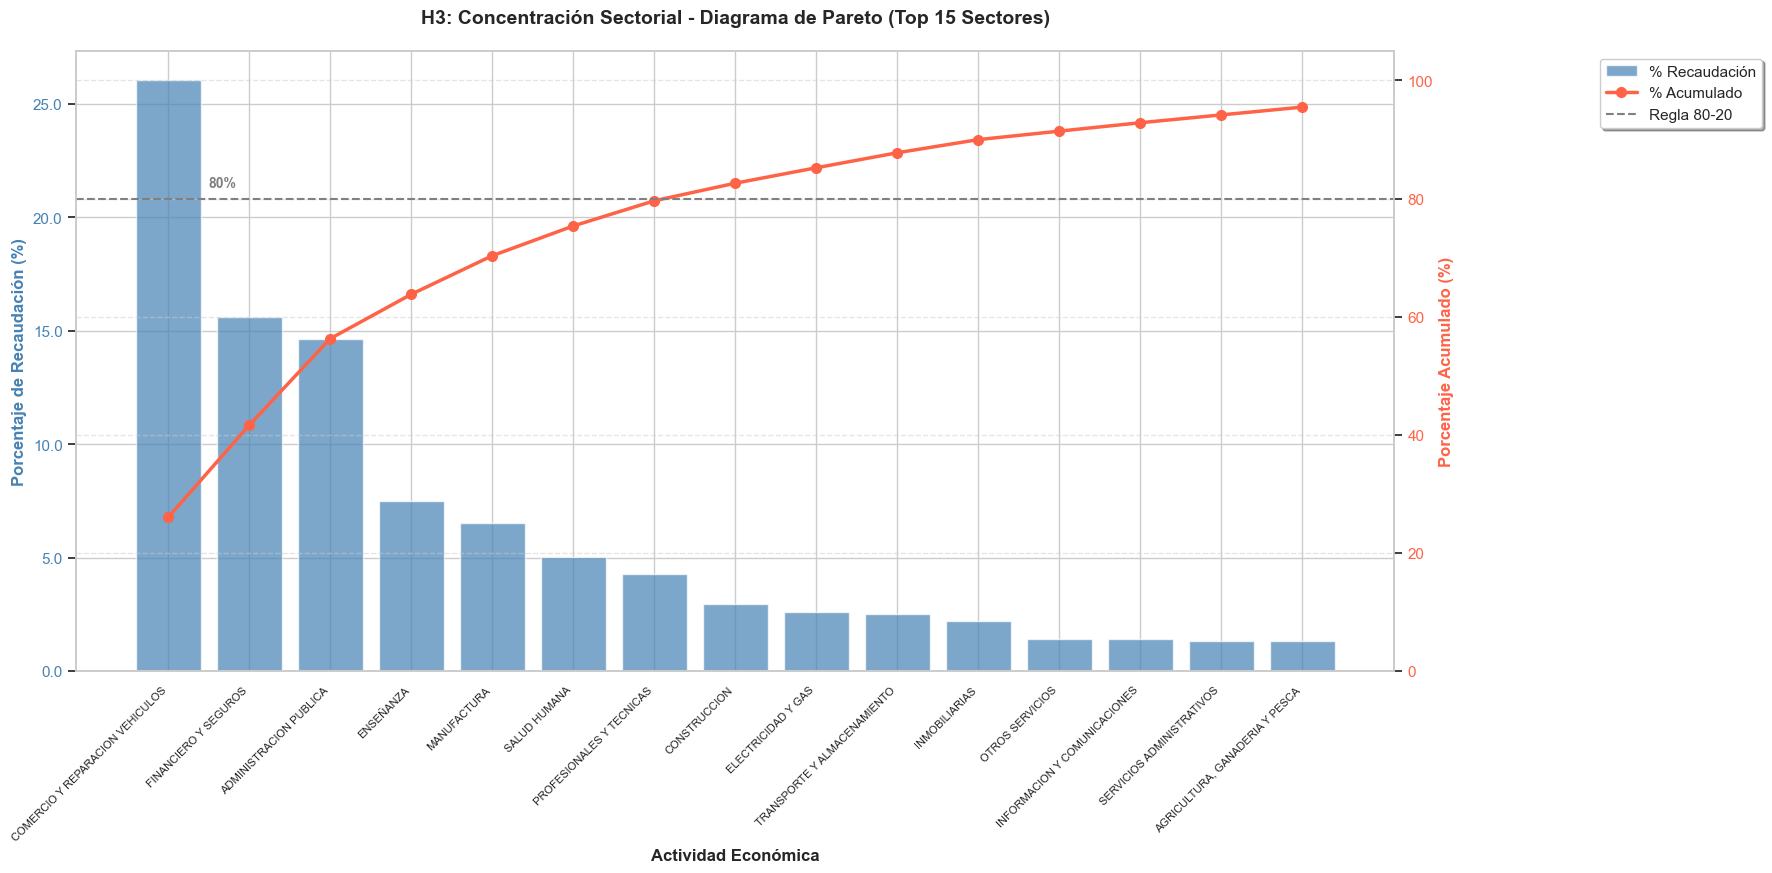


--- VALIDACIÓN DE HIPÓTESIS ---
HIPÓTESIS NO CONFIRMADA: El 20% de sectores solo genera el 63.79%

--- TOP 5 SECTORES VITALES ---
COMERCIO Y REPARACION VEHICULOS                    |  26.03% | Acum:  26.03%
FINANCIERO Y SEGUROS                               |  15.59% | Acum:  41.62%
ADMINISTRACION PUBLICA                             |  14.66% | Acum:  56.28%
ENSEÑANZA                                          |   7.51% | Acum:  63.79%
MANUFACTURA                                        |   6.53% | Acum:  70.32%


In [6]:
# ==========================================
# PARTE 3: Análisis de Concentración Sectorial (H3)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 1. Carga de Datos (si no lo has hecho ya)
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: No se encuentra el archivo .csv.")

# 2. Procesamiento: Agrupación por Actividad Económica
recaudacion_sector = df.groupby('DESCRIPCION_ACT_ECONOMICA')['VALOR_RECAUDADO'].sum().reset_index()
recaudacion_sector = recaudacion_sector.sort_values('VALOR_RECAUDADO', ascending=False)

# Cálculo de porcentajes y porcentaje acumulado
total_recaudacion = recaudacion_sector['VALOR_RECAUDADO'].sum()
recaudacion_sector['PORCENTAJE'] = (recaudacion_sector['VALOR_RECAUDADO'] / total_recaudacion) * 100
recaudacion_sector['PORCENTAJE_ACUM'] = recaudacion_sector['PORCENTAJE'].cumsum()

# Identificar los sectores vitales (20% de sectores que generan 80% de recaudación)
total_sectores = len(recaudacion_sector)
sectores_20_pct = int(total_sectores * 0.20)
top_20_sectores = recaudacion_sector.head(sectores_20_pct)
recaudacion_top_20 = top_20_sectores['PORCENTAJE'].sum()

print(f"\n--- ANÁLISIS DE PARETO ---")
print(f"Total de sectores: {total_sectores}")
print(f"Top 20% de sectores: {sectores_20_pct}")
print(f"Recaudación generada por top 20%: {recaudacion_top_20:.2f}%")

# 3. Visualización: Gráfico de Pareto MEJORADO
fig, ax1 = plt.subplots(figsize=(16, 8))

# Posiciones en el eje X
x_pos = np.arange(len(recaudacion_sector.head(15)))

# Barras (Porcentaje de recaudación por sector)
color_barras = 'steelblue'
ax1.set_xlabel('Actividad Económica', fontsize=12, fontweight='bold')
ax1.set_ylabel('Porcentaje de Recaudación (%)', color=color_barras, fontsize=12, fontweight='bold')
barras = ax1.bar(
    x_pos, 
    recaudacion_sector.head(15)['PORCENTAJE'],
    color=color_barras,
    alpha=0.7,
    label='% Recaudación'
)
ax1.tick_params(axis='y', labelcolor=color_barras)

# CORRECCION: Etiquetas rotadas y ajustadas para evitar superposición
ax1.set_xticks(x_pos)
ax1.set_xticklabels(
    recaudacion_sector.head(15)['DESCRIPCION_ACT_ECONOMICA'], 
    rotation=45, 
    ha='right',
    fontsize=8
)

# CORRECCION: Formatear eje Y sin notación científica
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.1f}'))

# Línea acumulada (Curva de Pareto)
ax2 = ax1.twinx()
color_linea = 'tomato'
ax2.set_ylabel('Porcentaje Acumulado (%)', color=color_linea, fontsize=12, fontweight='bold')
linea = ax2.plot(
    x_pos, 
    recaudacion_sector.head(15)['PORCENTAJE_ACUM'],
    color=color_linea,
    marker='o',
    linewidth=2.5,
    markersize=7,
    label='% Acumulado'
)
ax2.tick_params(axis='y', labelcolor=color_linea)
ax2.set_ylim([0, 105])

# Línea de referencia 80%
ax2.axhline(y=80, color='gray', linestyle='--', linewidth=1.5, label='Regla 80-20')
ax2.text(0.5, 82, '80%', fontsize=10, color='gray', fontweight='bold')

# Título
plt.title(
    'H3: Concentración Sectorial - Diagrama de Pareto (Top 15 Sectores)', 
    fontsize=14, 
    fontweight='bold',
    pad=20
)

# CORRECCION: Leyenda posicionada fuera del área de gráfica
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, 
           loc='upper left', 
           bbox_to_anchor=(1.15, 1),
           frameon=True,
           fancybox=True,
           shadow=True)

plt.grid(axis='y', linestyle='--', alpha=0.5)

# CORRECCION: Ajustar layout para evitar cortes
plt.tight_layout()
plt.subplots_adjust(bottom=0.15, right=0.88)

plt.show()

# 4. Validación de la Hipótesis
print(f"\n--- VALIDACIÓN DE HIPÓTESIS ---")
if recaudacion_top_20 >= 80:
    print(f"HIPÓTESIS CONFIRMADA: El 20% de sectores genera el {recaudacion_top_20:.2f}% de la recaudación")
    print(f"   Esto supera el umbral del 80%, confirmando alta concentración sectorial.")
else:
    print(f"HIPÓTESIS NO CONFIRMADA: El 20% de sectores solo genera el {recaudacion_top_20:.2f}%")

# Mostrar los sectores principales
print(f"\n--- TOP 5 SECTORES VITALES ---")
for idx, row in recaudacion_sector.head(5).iterrows():
    print(f"{row['DESCRIPCION_ACT_ECONOMICA']:50s} | {row['PORCENTAJE']:6.2f}% | Acum: {row['PORCENTAJE_ACUM']:6.2f}%")

Datos cargados correctamente.
Columna ANIO renombrada a ANO

--- ANÁLISIS DE ESTABILIDAD POR TIPO DE CONTRIBUYENTE ---
    ANO    TIPO_CONTRIBUYENTE          Media  Desviación Estándar  \
0  2020  Otros Contribuyentes    2049.659587         24440.705246   
1  2021    Gran Contribuyente   82192.485190        123130.287190   
2  2021  Otros Contribuyentes    1997.941804         16672.878140   
3  2022    Gran Contribuyente   82010.618705        100297.456847   
4  2022  Otros Contribuyentes    2472.429159         21931.425084   
5  2023  Otros Contribuyentes    3153.132808         32804.798036   
6  2024    Gran Contribuyente  117659.692941        110001.822565   
7  2024  Otros Contribuyentes    3334.380780         37721.165442   

       Varianza           CV  
0  5.973481e+08  1192.427533  
1  1.516107e+10   149.807232  
2  2.779849e+08   834.502692  
3  1.005958e+10   122.298135  
4  4.809874e+08   887.039574  
5  1.076155e+09  1040.387451  
6  1.210040e+10    93.491509  
7  1.422886

C:\Users\emili\AppData\Local\Temp\ipykernel_35776\2489478318.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


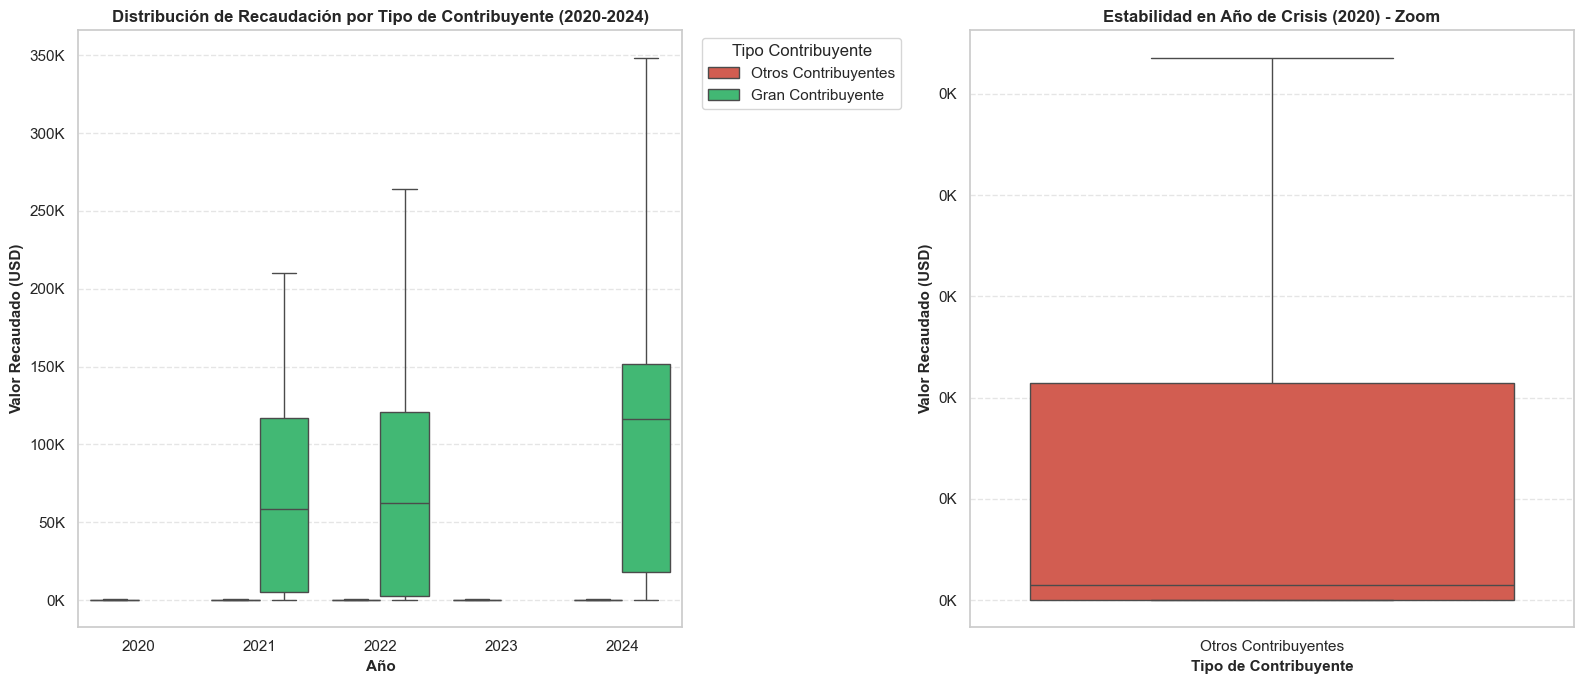

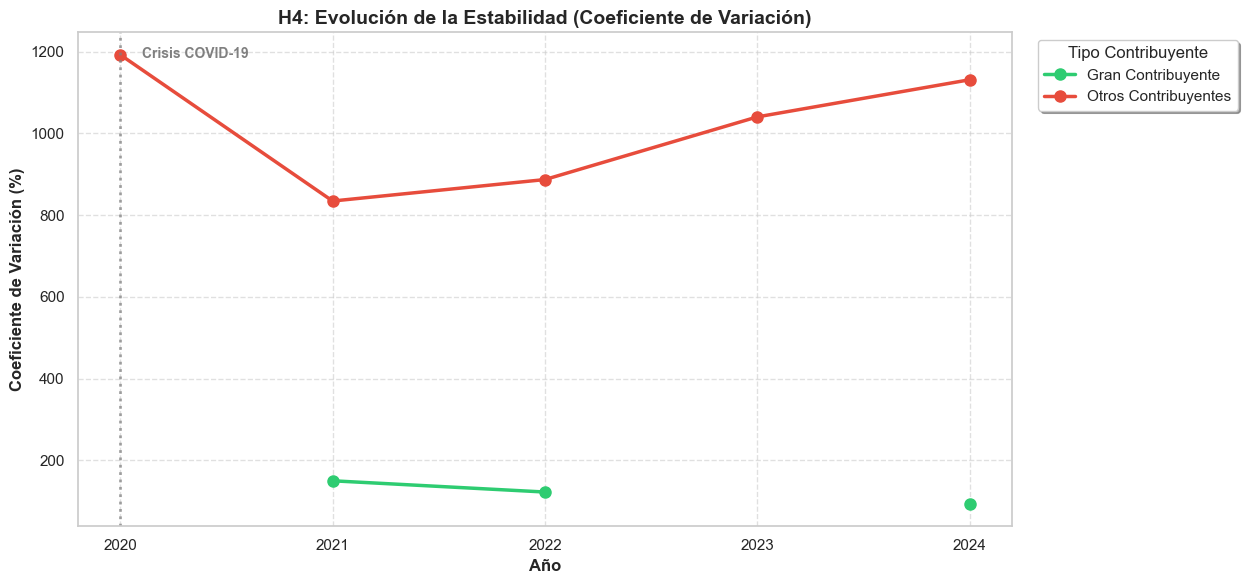


--- VALIDACIÓN FINAL DE HIPÓTESIS ---
No hay datos suficientes para 2020


In [7]:
# ==========================================
# PARTE 4: Grandes Contribuyentes como Colchón Fiscal (H4)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 1. Carga de Datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: No se encuentra el archivo .csv.")

# 2. Procesamiento: Crear categoría de contribuyente
df['TIPO_CONTRIBUYENTE'] = df['FLAG_GRAN_CONTRIBUYENTE'].apply(
    lambda x: 'Gran Contribuyente' if x == 1 else 'Otros Contribuyentes'
)

# Renombrar ANIO a ANO para consistencia
if 'ANIO' in df.columns:
    df.rename(columns={'ANIO': 'ANO'}, inplace=True)
    print("Columna ANIO renombrada a ANO")

# 3. Análisis Estadístico: Varianza y Estabilidad
print("\n--- ANÁLISIS DE ESTABILIDAD POR TIPO DE CONTRIBUYENTE ---")
varianza_analisis = df.groupby(['ANO', 'TIPO_CONTRIBUYENTE'])['VALOR_RECAUDADO'].agg([
    ('Media', 'mean'),
    ('Desviación Estándar', 'std'),
    ('Varianza', 'var'),
    ('CV', lambda x: x.std() / x.mean() * 100)
]).reset_index()

print(varianza_analisis)

# Análisis específico para 2020 (año de crisis)
print("\n--- COMPARACIÓN AÑO 2020 (CRISIS COVID) ---")
crisis_2020 = varianza_analisis[varianza_analisis['ANO'] == 2020]
print(crisis_2020)

if len(crisis_2020) == 2:
    gc_cv = crisis_2020[crisis_2020['TIPO_CONTRIBUYENTE'] == 'Gran Contribuyente']['CV'].values[0]
    otros_cv = crisis_2020[crisis_2020['TIPO_CONTRIBUYENTE'] == 'Otros Contribuyentes']['CV'].values[0]
    
    print(f"\nCoeficiente de Variación (2020):")
    print(f"  - Grandes Contribuyentes: {gc_cv:.2f}%")
    print(f"  - Otros Contribuyentes: {otros_cv:.2f}%")
    
    if gc_cv < otros_cv:
        print(f"VALIDACIÓN: Los GC muestran {otros_cv - gc_cv:.2f}% menos variabilidad")
    else:
        print(f"Los GC NO muestran mayor estabilidad")

# 4. Visualización: Boxplot Comparativo MEJORADO
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Boxplot general por año
sns.boxplot(
    data=df,
    x='ANO',
    y='VALOR_RECAUDADO',
    hue='TIPO_CONTRIBUYENTE',
    palette={'Gran Contribuyente': '#2ecc71', 'Otros Contribuyentes': '#e74c3c'},
    ax=axes[0],
    showfliers=False
)
axes[0].set_title('Distribución de Recaudación por Tipo de Contribuyente (2020-2024)', 
                   fontsize=12, fontweight='bold')
axes[0].set_xlabel('Año', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Valor Recaudado (USD)', fontsize=11, fontweight='bold')

# CORRECCION: Formatear eje Y sin notación científica
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))

# CORRECCION: Leyenda fuera del área de gráfica
axes[0].legend(title='Tipo Contribuyente', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 2: Zoom en 2020 (año de crisis)
df_2020 = df[df['ANO'] == 2020]
sns.boxplot(
    data=df_2020,
    x='TIPO_CONTRIBUYENTE',
    y='VALOR_RECAUDADO',
    palette={'Gran Contribuyente': '#2ecc71', 'Otros Contribuyentes': '#e74c3c'},
    ax=axes[1],
    showfliers=False
)
axes[1].set_title('Estabilidad en Año de Crisis (2020) - Zoom', 
                   fontsize=12, fontweight='bold')
axes[1].set_xlabel('Tipo de Contribuyente', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Valor Recaudado (USD)', fontsize=11, fontweight='bold')

# CORRECCION: Formatear eje Y sin notación científica
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M' if x >= 1e6 else f'{x/1e3:.0f}K'))
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5. Visualización Complementaria: Evolución de Coeficiente de Variación MEJORADA
fig2, ax = plt.subplots(figsize=(12, 6))

# Preparar datos para el gráfico de líneas
cv_por_ano = varianza_analisis.pivot(index='ANO', columns='TIPO_CONTRIBUYENTE', values='CV')

cv_por_ano.plot(
    kind='line',
    marker='o',
    linewidth=2.5,
    markersize=8,
    color=['#2ecc71', '#e74c3c'],
    ax=ax
)

ax.set_title('H4: Evolución de la Estabilidad (Coeficiente de Variación)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Año', fontsize=12, fontweight='bold')
ax.set_ylabel('Coeficiente de Variación (%)', fontsize=12, fontweight='bold')

# CORRECCION: Formatear eje X sin decimales en años
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x)}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# CORRECCION: Leyenda fuera del área
ax.legend(title='Tipo Contribuyente', loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True)
ax.grid(True, linestyle='--', alpha=0.6)

# Resaltar año 2020
ax.axvline(x=2020, color='gray', linestyle=':', linewidth=2, alpha=0.7)
ax.text(2020.1, ax.get_ylim()[1] * 0.95, 'Crisis COVID-19', 
        fontsize=10, color='gray', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

# 6. Validación Final de Hipótesis
print("\n--- VALIDACIÓN FINAL DE HIPÓTESIS ---")
if len(crisis_2020) == 2:
    gc_estable = (crisis_2020[crisis_2020['TIPO_CONTRIBUYENTE'] == 'Gran Contribuyente']['CV'].values[0] 
                  < crisis_2020[crisis_2020['TIPO_CONTRIBUYENTE'] == 'Otros Contribuyentes']['CV'].values[0])
    
    if gc_estable:
        print("HIPÓTESIS CONFIRMADA:")
        print("   Los Grandes Contribuyentes actúan como 'colchón fiscal' durante crisis,")
        print("   mostrando menor variabilidad en la recaudación comparado con otros contribuyentes.")
    else:
        print("HIPÓTESIS NO CONFIRMADA")
else:
    print("No hay datos suficientes para 2020")

Datos cargados correctamente.

--- RECAUDACIÓN TOTAL ANUAL POR SECTOR ---
SECTOR_AGRUPADO  AGRICULTURA     COMERCIO  MANUFACTURA        OTROS  \
ANO                                                                   
2020              1033441.89  17436096.78   4936466.69  24715320.63   
2021              1302599.40  24452338.75   5319663.43  31824101.48   
2022              1303698.30  25752251.88   6613030.28  42783005.08   
2023              1215798.63  26626139.28   6482042.49  45449812.05   
2024              1172605.94  24386909.79   6421301.99  50383802.52   

SECTOR_AGRUPADO    SERVICIOS     TURISMO  
ANO                                       
2020             16184546.93   832308.76  
2021             16651151.02  1128929.38  
2022             20636919.69   988992.23  
2023             21486409.88  1317514.18  
2024             25744410.03  1307433.97  

--- TASAS DE CRECIMIENTO ANUAL (%) ---
SECTOR_AGRUPADO  AGRICULTURA   COMERCIO  MANUFACTURA      OTROS  SERVICIOS  \
ANO      

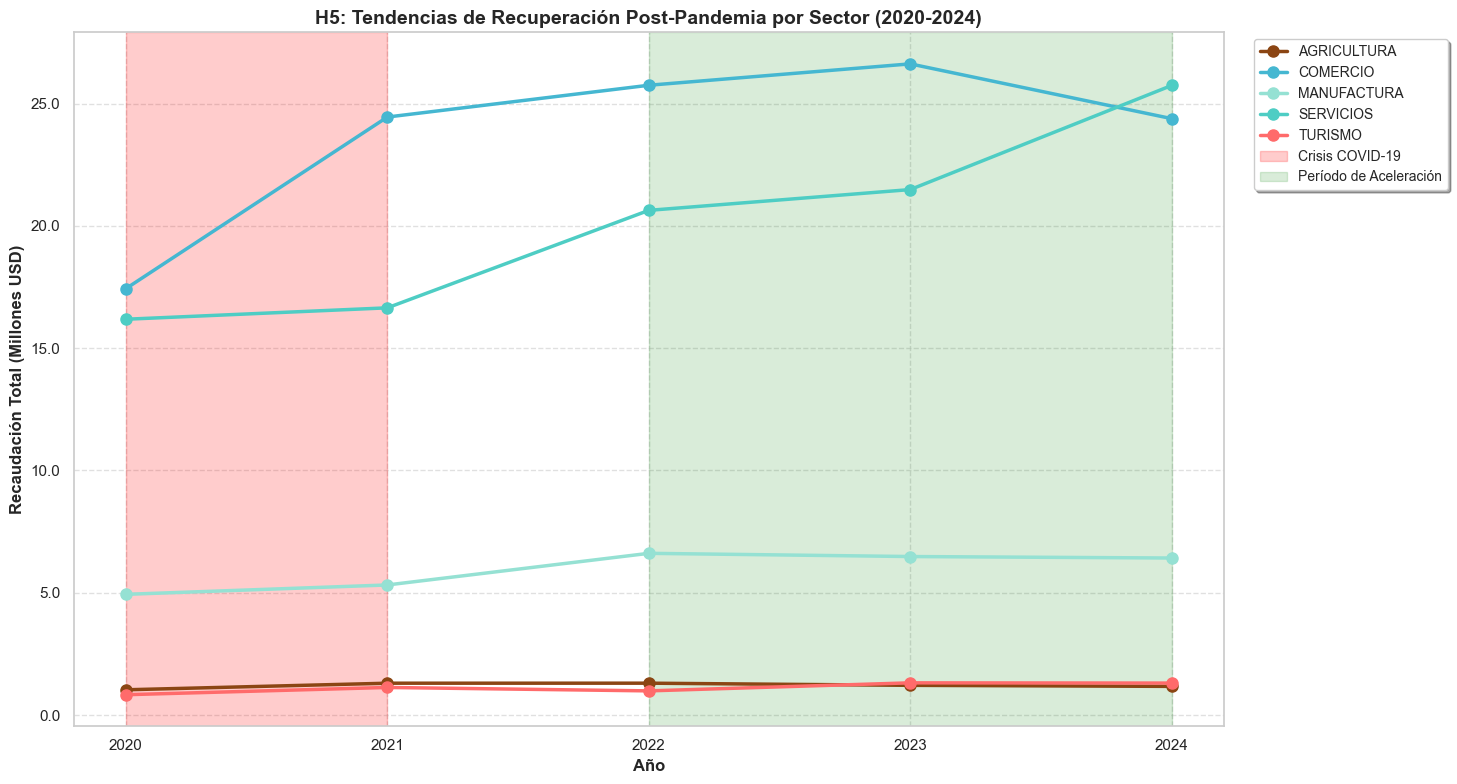

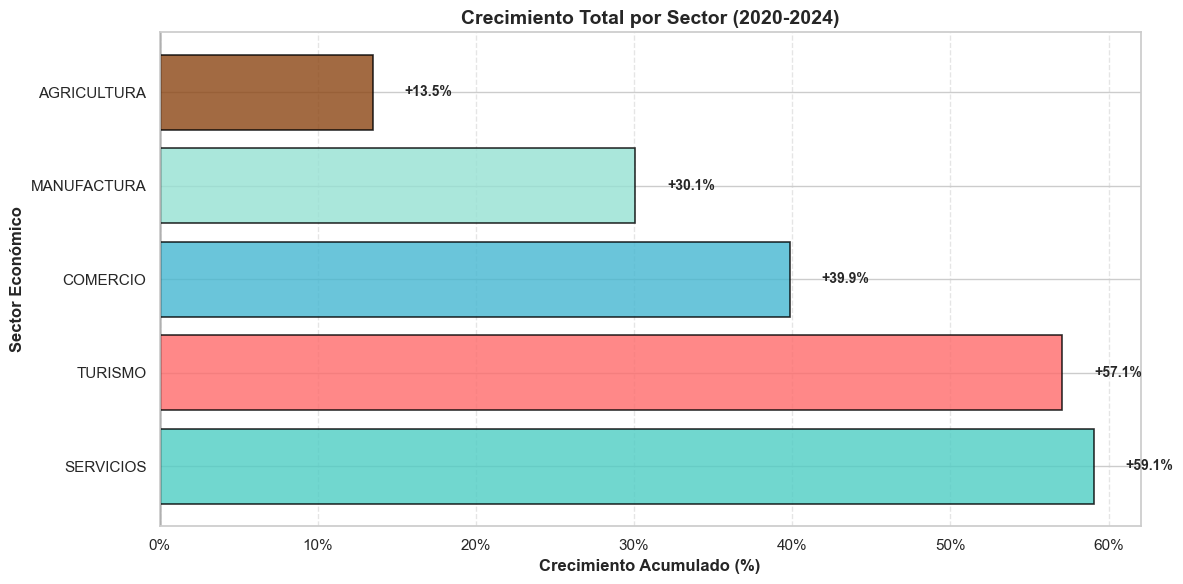


--- VALIDACIÓN DE HIPÓTESIS ---
Aceleración 2022-2024:
  - Turismo/Servicios (promedio): +28.47%
  - Agricultura: -10.06%

HIPÓTESIS CONFIRMADA:
   Los sectores terciarios (Turismo/Servicios) han mostrado
   una aceleración 38.53% superior a la Agricultura
   en el período de recuperación 2022-2024.


In [8]:
# ==========================================
# PARTE 5: Recuperación Desigual Post-Pandemia (H5)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

# 1. Carga de Datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("Datos cargados correctamente.")
except FileNotFoundError:
    print("Error: No se encuentra el archivo .csv.")

# Renombrar ANIO a ANO si existe
if 'ANIO' in df.columns:
    df.rename(columns={'ANIO': 'ANO'}, inplace=True)

# 2. Identificar sectores clave para comparación
sectores_interes = {
    'AGRICULTURA': ['AGRICULTURA', 'GANADERIA', 'SILVICULTURA', 'PESCA'],
    'TURISMO': ['ALOJAMIENTO', 'SERVICIOS DE COMIDA', 'HOTELES', 'RESTAURANTES'],
    'SERVICIOS': ['PROFESIONALES', 'TECNICOS', 'INMOBILIARIAS', 'FINANCIERO'],
    'COMERCIO': ['COMERCIO'],
    'MANUFACTURA': ['MANUFACTURA', 'INDUSTRIA']
}

# Función para clasificar sectores
def clasificar_sector(descripcion):
    desc_upper = str(descripcion).upper()
    
    for categoria, keywords in sectores_interes.items():
        for keyword in keywords:
            if keyword in desc_upper:
                return categoria
    return 'OTROS'

# Aplicar clasificación
df['SECTOR_AGRUPADO'] = df['DESCRIPCION_ACT_ECONOMICA'].apply(clasificar_sector)

# 3. Análisis de Recaudación Anual por Sector
print("\n--- RECAUDACIÓN TOTAL ANUAL POR SECTOR ---")
recaudacion_anual = df.groupby(['ANO', 'SECTOR_AGRUPADO'])['VALOR_RECAUDADO'].sum().reset_index()
recaudacion_anual_pivot = recaudacion_anual.pivot(index='ANO', columns='SECTOR_AGRUPADO', values='VALOR_RECAUDADO')

print(recaudacion_anual_pivot)

# 4. Cálculo de Tasas de Crecimiento
print("\n--- TASAS DE CRECIMIENTO ANUAL (%) ---")
crecimiento = recaudacion_anual_pivot.pct_change() * 100
print(crecimiento)

# Crecimiento acumulado
print("\n--- CRECIMIENTO ACUMULADO POR SECTOR ---")
anos_disponibles = recaudacion_anual_pivot.index.tolist()
ano_inicial = min(anos_disponibles)
ano_final = max(anos_disponibles)

crecimiento_total = {}
for sector in recaudacion_anual_pivot.columns:
    if ano_inicial in recaudacion_anual_pivot.index and ano_final in recaudacion_anual_pivot.index:
        valor_inicial = recaudacion_anual_pivot.loc[ano_inicial, sector]
        valor_final = recaudacion_anual_pivot.loc[ano_final, sector]
        
        if not pd.isna(valor_inicial) and valor_inicial > 0:
            crecimiento_pct = ((valor_final - valor_inicial) / valor_inicial) * 100
            crecimiento_total[sector] = crecimiento_pct
            print(f"{sector:15s}: {crecimiento_pct:+8.2f}%")

# Identificar sectores con mayor recuperación
crecimiento_df = pd.DataFrame(list(crecimiento_total.items()), 
                               columns=['Sector', 'Crecimiento_%'])
crecimiento_df = crecimiento_df.sort_values('Crecimiento_%', ascending=False)

print("\n--- RANKING DE RECUPERACIÓN ---")
for idx, row in crecimiento_df.iterrows():
    print(f"{row['Sector']:15s}: {row['Crecimiento_%']:+8.2f}%")

# 5. Análisis de Aceleración (2022-2024 vs 2020-2022)
print("\n--- ANÁLISIS DE ACELERACIÓN (Últimos 2 años) ---")
aceleracion = {}
if 2022 in anos_disponibles and 2024 in anos_disponibles:
    for sector in recaudacion_anual_pivot.columns:
        valor_2022 = recaudacion_anual_pivot.loc[2022, sector]
        valor_2024 = recaudacion_anual_pivot.loc[2024, sector]
        
        if not pd.isna(valor_2022) and valor_2022 > 0:
            aceleracion_pct = ((valor_2024 - valor_2022) / valor_2022) * 100
            aceleracion[sector] = aceleracion_pct
            print(f"{sector:15s}: {aceleracion_pct:+8.2f}% (2022-2024)")

# 6. Visualización: Gráfico de Líneas de Tendencias MEJORADO
fig, ax = plt.subplots(figsize=(14, 8))

# Colores específicos por sector
colores = {
    'AGRICULTURA': '#8B4513',
    'TURISMO': '#FF6B6B',
    'SERVICIOS': '#4ECDC4',
    'COMERCIO': '#45B7D1',
    'MANUFACTURA': '#95E1D3',
    'OTROS': '#CCCCCC'
}

# Plotear cada sector
for sector in recaudacion_anual_pivot.columns:
    if sector in ['AGRICULTURA', 'TURISMO', 'SERVICIOS', 'COMERCIO', 'MANUFACTURA']:
        ax.plot(
            recaudacion_anual_pivot.index,
            recaudacion_anual_pivot[sector] / 1e6,
            marker='o',
            linewidth=2.5,
            markersize=8,
            label=sector,
            color=colores.get(sector, '#000000')
        )

# Resaltar período de crisis y recuperación
if 2020 in anos_disponibles:
    ax.axvspan(2020, 2021, alpha=0.2, color='red', label='Crisis COVID-19')
if 2022 in anos_disponibles:
    ax.axvspan(2022, 2024, alpha=0.15, color='green', label='Período de Aceleración')

ax.set_title('H5: Tendencias de Recuperación Post-Pandemia por Sector (2020-2024)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Año', fontsize=12, fontweight='bold')
ax.set_ylabel('Recaudación Total (Millones USD)', fontsize=12, fontweight='bold')

# CORRECCION: Formatear eje X sin decimales en años
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x)}'))
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# CORRECCION: Formatear eje Y sin notación científica
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.1f}'))

# CORRECCION: Leyenda fuera del área de gráfica
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), frameon=True, shadow=True, fontsize=10)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.subplots_adjust(right=0.88)
plt.show()

# 7. Visualización Complementaria: Barras de Crecimiento Acumulado MEJORADA
fig2, ax2 = plt.subplots(figsize=(12, 6))

sectores_plot = crecimiento_df[crecimiento_df['Sector'].isin(['AGRICULTURA', 'TURISMO', 'SERVICIOS', 'COMERCIO', 'MANUFACTURA'])]
colores_barras = [colores.get(s, '#CCCCCC') for s in sectores_plot['Sector']]

ax2.barh(
    sectores_plot['Sector'],
    sectores_plot['Crecimiento_%'],
    color=colores_barras,
    alpha=0.8,
    edgecolor='black',
    linewidth=1.2
)

# Línea de referencia en 0%
ax2.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Etiquetas de valores
for idx, row in sectores_plot.iterrows():
    valor = row['Crecimiento_%']
    ax2.text(
        valor + (2 if valor > 0 else -2),
        row['Sector'],
        f"{valor:+.1f}%",
        va='center',
        fontweight='bold',
        fontsize=10
    )

ax2.set_title(f'Crecimiento Total por Sector ({ano_inicial}-{ano_final})', 
              fontsize=14, fontweight='bold')
ax2.set_xlabel('Crecimiento Acumulado (%)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sector Económico', fontsize=12, fontweight='bold')

# CORRECCION: Formatear eje X
ax2.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{x:.0f}%'))
ax2.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 8. Validación de Hipótesis
print("\n--- VALIDACIÓN DE HIPÓTESIS ---")

if 'TURISMO' in aceleracion and 'AGRICULTURA' in aceleracion:
    aceleracion_turismo = aceleracion.get('TURISMO', 0)
    aceleracion_servicios = aceleracion.get('SERVICIOS', 0)
    aceleracion_agricultura = aceleracion.get('AGRICULTURA', 0)
    
    promedio_terciario = (aceleracion_turismo + aceleracion_servicios) / 2
    
    print(f"Aceleración 2022-2024:")
    print(f"  - Turismo/Servicios (promedio): {promedio_terciario:+.2f}%")
    print(f"  - Agricultura: {aceleracion_agricultura:+.2f}%")
    
    if promedio_terciario > aceleracion_agricultura:
        diferencia = promedio_terciario - aceleracion_agricultura
        print(f"\nHIPÓTESIS CONFIRMADA:")
        print(f"   Los sectores terciarios (Turismo/Servicios) han mostrado")
        print(f"   una aceleración {diferencia:.2f}% superior a la Agricultura")
        print(f"   en el período de recuperación 2022-2024.")
    else:
        print(f"\nHIPÓTESIS NO CONFIRMADA")
else:
    print("Datos insuficientes para validar completamente")